In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb 
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Detection of Outlier Through IsolationForest Method

In [6]:
clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
preds = clf.fit_predict(df)
preds

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

In [7]:
mask = preds != -1
print(type(mask))


<class 'numpy.ndarray'>


In [8]:
outliers_removed_isolationforest = df.iloc[mask,:]
print('The len of the dataframe after the removal of Outliers is:',len(outliers_removed_isolationforest))

The len of the dataframe after the removal of Outliers is: 392


In [39]:
outliers_removed_isolationforest.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Detection of Outlier Through Standard Deviation method

In [10]:
# Calculate summary statistics
data_mean, data_std = np.mean(df), np.std(df)
print('Mean:', data_mean)
print('Standard Deviation:', data_std)

Mean: crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
black      356.674032
lstat       12.653063
medv        22.532806
dtype: float64
Standard Deviation: crim         8.593041
zn          23.299396
indus        6.853571
chas         0.253743
nox          0.115763
rm           0.701923
age         28.121033
dis          2.103628
rad          8.698651
tax        168.370495
ptratio      2.162805
black       91.204607
lstat        7.134002
medv         9.188012
dtype: float64


In [11]:
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print('Cut Off Value from Mean:', cut_off)
print('Lower Bound:', lower)
print('Upper Bound:', upper)

Cut Off Value from Mean: crim        25.779124
zn          69.898187
indus       20.560712
chas         0.761229
nox          0.347289
rm           2.105768
age         84.363098
dis          6.310885
rad         26.095953
tax        505.111485
ptratio      6.488416
black      273.613822
lstat       21.402005
medv        27.564035
dtype: float64
Lower Bound: crim      -22.165600
zn        -58.534551
indus      -9.423933
chas       -0.692059
nox         0.207406
rm          4.178867
age       -15.788197
dis        -2.515842
rad       -16.546546
tax       -96.874331
ptratio    11.967118
black      83.060209
lstat      -8.748942
medv       -5.031228
dtype: float64
Upper Bound: crim        29.392648
zn          81.261823
indus       31.697490
chas         0.830399
nox          0.901984
rm           8.390402
age        152.937999
dis         10.105928
rad         35.645360
tax        913.348639
ptratio     24.943949
black      630.287854
lstat       34.055068
medv        50.096841
dtype: fl

In [41]:
# Identify outliers
dummy=df.zn.all()
outliers =  [x for x in dummy if x < (lower) or x >(upper)] 
print('Identified outliers: %d' % len(outliers))

TypeError: 'numpy.bool_' object is not iterable

Text(0.5, 1.0, 'Box and Whisker Plot')

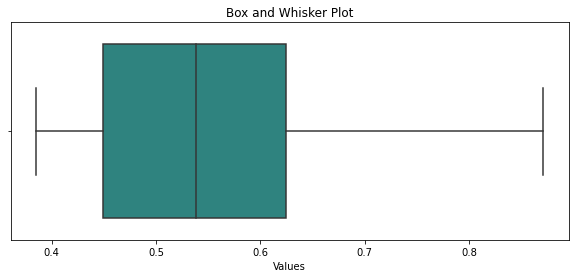

In [43]:
plt.figure(figsize=(10, 4))
sb.boxplot(df['nox'], palette='viridis')
plt.xlabel('Values')
plt.title('Box and Whisker Plot')

In [ ]:
df.corr().T
